In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../data/data_preprocessed.csv').set_index('CUST_ID') # read data

In [3]:
class kmeans_model:
    def __init__ (self, data):
        self.data = data

    def kmeans_model (self, max_clusters, min_clusters=1):
        """
        Function to create multiple iterations of KMeans model

        Args:
            min_clusters: minimum number of clusters, default at 2
            max_clusters: maximum number of clusters

        Returns:
            kmeans_models: list of KMeans models
        
        """
        self.kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(self.data) for k in range (min_clusters, max_clusters)]

        innertia = [model.inertia_ for model in self.kmeans_models]

        plt.plot(range(min_clusters, max_clusters), innertia)
        plt.title('Elbow method')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.show()

        return self.kmeans_models
        
    def search_optimal_clusters(self):
        """
        Function to search optimal number of clusters

        Returns:
            optimal_score: optimal cluster with the highest silhouette score
        
        """
        silhoutte_scores = [silhouette_score(self.data, model.labels_) for model in self.kmeans_models[1:]]
        silh_score = pd.DataFrame(silhoutte_scores,range(2,len(kmeans_models)+1),columns=['silhoutte_score'])
        plt.plot(silh_score,"bo-")
        plt.xticks(range(2,len(kmeans_models)+1))
        plt.title('Silhoutte scores vs Number of clusters')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhoutte score')

        self.optimal_score = silh_score.idxmax()
        
        return self.optimal_score['silhoutte_score']

    def optimal_model(self):
        """
        Function to execute the model with optimal parameters

        Returns:
            data_clusters [DataFrame]: optimal model with labels 
            optimal_kmeans [KMeans]: optimal KMeans model
        
        """
        optimal_kmeans = KMeans(n_clusters=self.optimal_score['silhoutte_score'], random_state=23).fit(self.data)

        data_clusters = self.data.copy() # copy data
        data_clusters['cluster'] = optimal_kmeans.labels_ # add cluster column

        
        print('Silhoutte score of our model is ' + str(silhouette_score(self.data, optimal_kmeans.labels_)))
        return data_clusters, optimal_kmeans


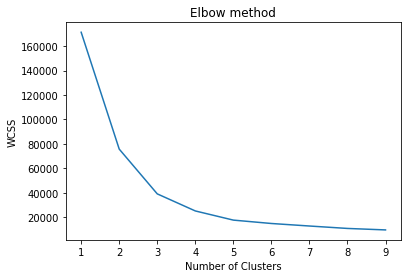

Silhoutte score of our model is 0.5562286011068965


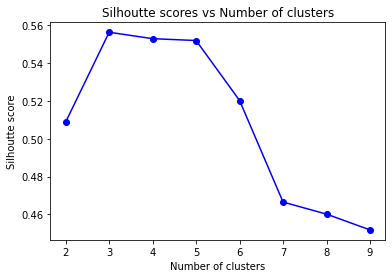

In [8]:
kmeans = kmeans_model(df) # instantiate kmeans model
kmeans_models = kmeans.kmeans_model(min_clusters=1, max_clusters=10) # run multiple iterations of kmeans model
optimal_clusters = kmeans.search_optimal_clusters() # search for optimal number of clusters
cluster_labels, optimal_kmeans = kmeans.optimal_model()

In [160]:
cluster_labels

,PC1,PC2,cluster
CUST_ID,,,
C10001,0.977727,-6.019202,0
C10002,-8.378747,1.501084,2
C10005,-1.123715,-4.079621,0
C10006,3.731336,-3.660419,0
C10008,2.729357,-4.185211,0
...,...,...,...
C18980,3.230708,-5.049649,0
C18986,4.963817,-3.152891,0
C18993,1.397357,1.572474,1
